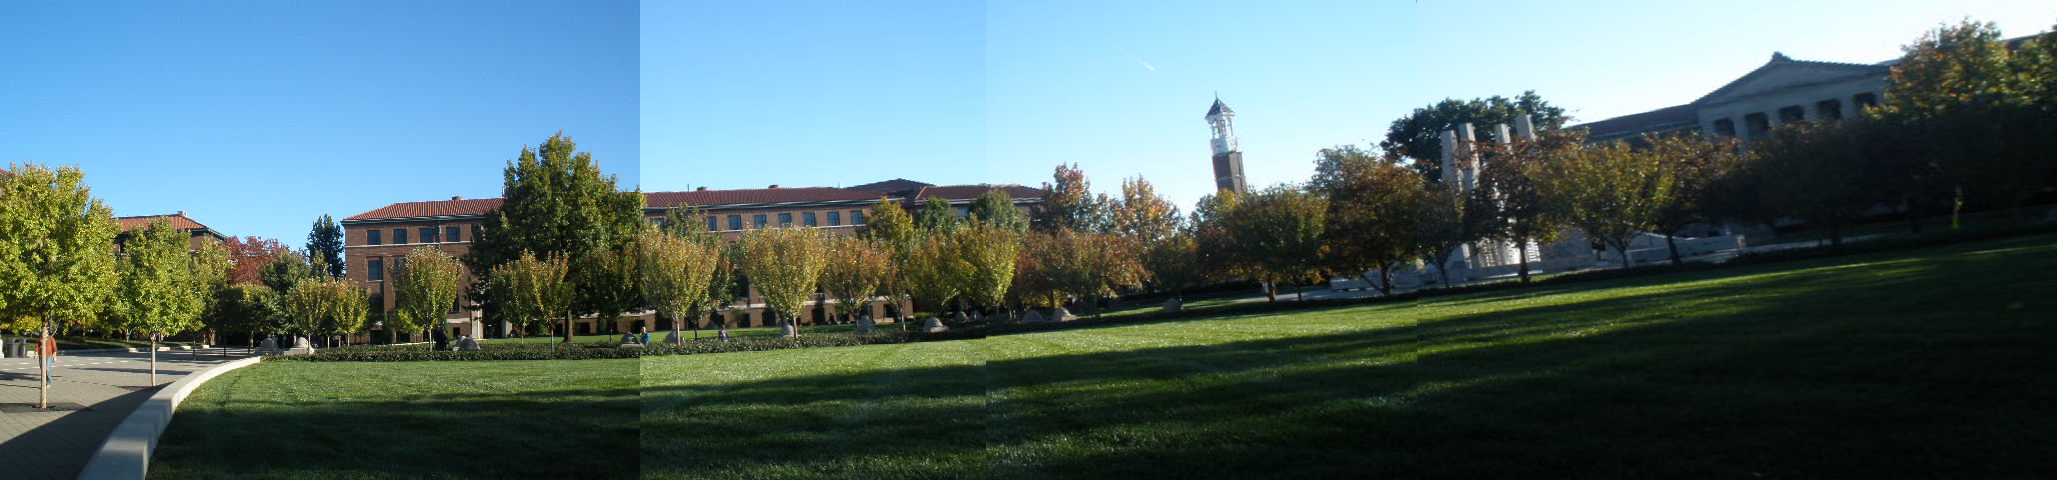

False

In [ ]:
#This code implements a function called image_stitcher for stitching the images together.
#After stitching the images together we can visualize them at the end.
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def image_stitcher(img_source , img_des):

    #create the SIFT detector object
    sift = cv2.SIFT_create()

    #compute the keypoints and descriptors
    keypoints1, descriptors1 = sift.detectAndCompute(img_source, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img_des, None)

    #initialize the flannbasedmatcher
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    #Match the descriptors
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to select good matches
    #Apply the ratio test. Even though the threshold is high the result is okay
    good_matches = []
    for m, n in matches:
        if m.distance < 0.8 * n.distance:
            good_matches.append(m)

    #Apply RANSAC
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Estimate homography using RANSAC
    homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    #Calculate the necessary dimensions for plotting the images.
    destination_height, destination_width = img_des.shape[:2]
    source_height , source_width = img_source.shape[:2]
    #Warp the source image based on the homography and draw the destination image on top of it to merge the two
    warped_source = cv2.warpPerspective(img_source, homography, (destination_width + source_width, destination_height))
    warped_source[0:destination_height, 0:destination_width] = img_des

    return warped_source

#Pass the images one by one
img_des = cv2.imread('/content/PA120275.JPG') #destination
img_source = cv2.imread('/content/PA120274.JPG') #source

warped_source = image_stitcher(img_source , img_des)
#After recieving the warped source just process the frames and crop out the black area.
gray_source = cv2.cvtColor(warped_source, cv2.COLOR_BGR2GRAY)
index = 0
for i in range(len(gray_source[0])):
    pixel_value = gray_source[0][i]
    if(pixel_value == 0):
        index = i - 1
        break
if (index > 0):
    warped_source = warped_source[: ,  :index]

img_des_2 = warped_source
img_source_2 = cv2.imread('/content/PA120273.JPG')

warped_source_2 = image_stitcher(img_source_2 , img_des_2)
gray_source_2 = cv2.cvtColor(warped_source_2, cv2.COLOR_BGR2GRAY)
index = 0
for i in range(len(gray_source_2[0])):
    pixel_value = gray_source_2[0][i]
    if(pixel_value == 0):
        index = i - 1
        break
if (index > 0):
    warped_source_2 = warped_source_2[: , :index]

#cv2_imshow(warped_source_2)


img_des_3 = warped_source_2
img_source_3 = cv2.imread('/content/PA120272 (1).JPG')

warped_source_3 = image_stitcher(img_source_3 , img_des_3)
gray_source_3 = cv2.cvtColor(warped_source_3, cv2.COLOR_BGR2GRAY)
index = 0
for i in range(len(gray_source_3[0])):
    pixel_value = gray_source_3[0][i]
    if(pixel_value == 0):
        index = i - 1
        break
if (index > 0):
    warped_source_3 = warped_source_3[: ,  :index]
cv2_imshow(warped_source_3)
cv2.imwrite('assets/final_warped_image.JPG' , warped_source_3)

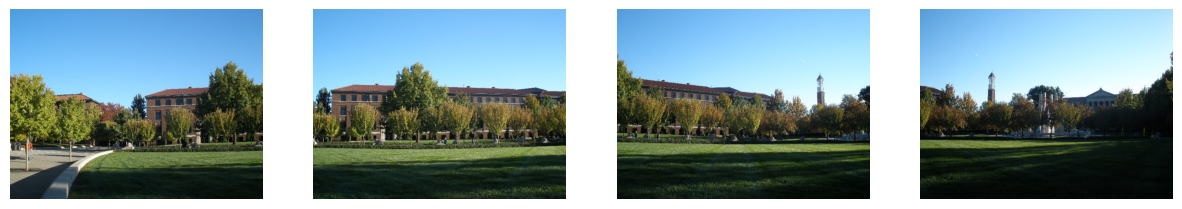

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image1_rgb = cv2.cvtColor(img_des, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(img_source, cv2.COLOR_BGR2RGB)
image3_rgb = cv2.cvtColor(img_source_2, cv2.COLOR_BGR2RGB)
image4_rgb = cv2.cvtColor( img_source_3, cv2.COLOR_BGR2RGB)

# List of images
images = [image1_rgb, image2_rgb, image3_rgb, image4_rgb]

# Plot the images in a row
fig, axs = plt.subplots(1, 4, figsize=(15, 5))  # 1 row, 4 columns

for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')  # Hide axes

plt.show()
